In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Change this line to your own student ID
student_id = 10818755

np.random.seed(student_id)

def make_class0_samples(c,sd,n_samples):
    """Generate samples from class 0"""
    return np.random.normal(loc=c,scale=sd,size=[n_samples,2])

def make_class1_samples(c,r,n_samples):
    """Generate samples from class 1"""
    A=np.random.random(n_samples)*2*np.pi
    d=np.random.normal(r,0.2*r,n_samples)
    X=np.zeros([n_samples,2])
    X[:,0]=d*np.cos(A)+c[0]
    X[:,1]=d*np.sin(A)+c[1]
    return X

def make_circle(n, x,y,r):
  
    t=np.linspace(0,2*np.pi,n,endpoint=False)
    p=np.zeros((2,n))
    p[0,:]=x+r*np.cos(t)
    p[1,:]=y+r*np.sin(t)
    return p

In [2]:
def sigmoid(x):
    s = np.exp(x)/(1+np.exp(x))
    return s

class CostFunction:
    def __init__(self,pts):
        self.pts=pts
  
    def f(self,x):
        r= np.sqrt(np.square(self.pts[0,:]-x[0]) + 
                   np.square(self.pts[1,:]-x[1]))
        d= np.abs(r) - x[2]
        
        # Threshold
        threshold = 0
        
        # True labels
        Y0 = np.zeros(200)
        Y1 = np.ones(200)
        Y = np.append(Y0, Y1, 0)
        
        # Encourage the classification
        itn = np.size(d,0)
        
        for i in range(itn):
            if d[i] <= threshold:
                # Encourage to class 0
                d[i] = -500
                
            elif d[i] > threshold:
                # Encourage to class 1
                d[i] = 500
        
        out = sigmoid(d)
        # Mean Squre Error function
        e = (1/itn)*np.sum((out - Y)**2)
        # e = np.sum((cls - Y)**2)
        return e

<function matplotlib.pyplot.show(*args, **kw)>

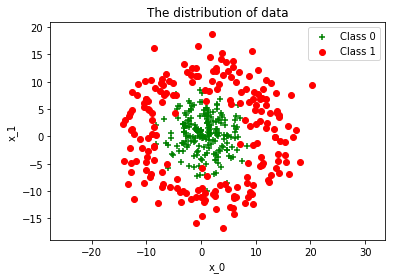

In [3]:
n_samples = 200
c0 = np.random.random([2])
r0 = 3+np.random.random()
r1 = 3.5*r0+np.random.random()
X0 = make_class0_samples(c0,r0,n_samples)
X1 = make_class1_samples(c0,r1,n_samples)

c_X0 = np.mean(X0,0)

X = np.append(X0, X1, 0)

# True labels
Y0 = np.zeros(n_samples)
Y1 = np.ones(n_samples)
Y = np.append(Y0, Y1, 0)

# Each row of X0 and X1 is one 2D sample
# So a point from X0 is given by (X0[i,0],X0[i,1])
plt.figure()
plt.scatter(X0[:,0], X0[:,1], c='g', marker='+',label="Class 0")
plt.scatter(X1[:,0], X1[:,1], c='r', marker='o',label="Class 1")
plt.xlabel("x_0")
plt.ylabel("x_1")
plt.title("The distribution of data")
plt.legend()
plt.axis('equal')
plt.show

Data using cost function: (Powell) Best fit has centre ( -0.04 , 0.24 ) , radius  7.88


<function matplotlib.pyplot.show(*args, **kw)>

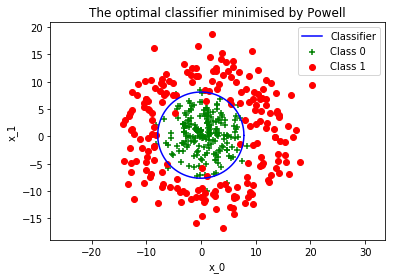

In [4]:
'''Please change this initial points'''
# Initial point
# x0 = np.ones(3)
x0 = np.zeros(3)
# x0 = np.random.randn(3)

# claculate the cost
c = CostFunction(X.T)

''' use Powell minimisation methods'''
res_cir1 = minimize(c.f,x0,method='Powell')

print("Data using cost function: (Powell) Best fit has centre (", "{:.2f}".format(res_cir1.x[0]),",",
                            "{:.2f}".format(res_cir1.x[1]), ")",", radius ",
                            "{:.2f}".format(res_cir1.x[2]))

cir1 = make_circle(500,res_cir1.x[0], res_cir1.x[1], res_cir1.x[2])

plt.figure()
plt.scatter(X0[:,0], X0[:,1], c='g', marker='+',label="Class 0")
plt.scatter(X1[:,0], X1[:,1], c='r', marker='o',label="Class 1")
plt.plot(cir1[0,:],cir1[1,:],c="blue",label="Classifier")
plt.xlabel("x_0")
plt.ylabel("x_1")
plt.title("The optimal classifier minimised by Powell")
plt.legend()
plt.axis('equal')
plt.show

In [5]:
# The number of misclassified samples
'''class 0'''
dr0 = np.sqrt((X0[:,0] - res_cir1.x[0])**2 + (X0[:,1] - res_cir1.x[1])**2)
dr0 = dr0 - res_cir1.x[2]
miscls0_array = np.array([])
miscls1_array = np.array([])
for i in range(np.size(dr0,0)):
    if dr0[i] <= 0:
        # Correct classification
        miscls0_array = np.append(miscls0_array, 0)
        
    elif dr0[i] > 0:
        # Incorrect classification
        miscls0_array = np.append(miscls0_array, 1)
n_miscls0 = np.sum(miscls0_array)

'''class 1'''
dr1 = np.sqrt((X1[:,0] - res_cir1.x[0])**2 + (X1[:,1] - res_cir1.x[1])**2)
dr1 = dr1 - res_cir1.x[2]
for i in range(np.size(dr1,0)):
    if dr1[i] <= 0:
        # Incorrect classification
        miscls1_array = np.append(miscls1_array, 1)
        
    elif dr1[i] > 0:
        # Correct classification
        miscls1_array  = np.append(miscls1_array, 0)
n_miscls1 = np.sum(miscls1_array)

print("The number of class 0 misclassified as class 1 using that circle is ", n_miscls0)
print("The number of class 1 misclassified as class 0 using that circle is ", n_miscls1)
print("Accuracy is ", 100 * ((2*n_samples)-(n_miscls1+n_miscls0))/(2*n_samples),"%")

The number of class 0 misclassified as class 1 using that circle is  10.0
The number of class 1 misclassified as class 0 using that circle is  5.0
Accuracy is  96.25 %


Data using cost function: (Nelder-Mead) Best fit has centre ( 0.00 , 0.00 ) , radius  0.00


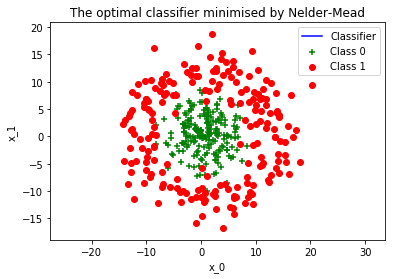

In [6]:
''' use Nelder-Mead minimisation methods'''
res_cir2 = minimize(c.f,x0,method='Nelder-Mead') 

print("Data using cost function: (Nelder-Mead) Best fit has centre (", "{:.2f}".format(res_cir2.x[0]),",",
                            "{:.2f}".format(res_cir2.x[1]), ")",", radius ",
                            "{:.2f}".format(res_cir2.x[2]))

cir2 = make_circle(500,res_cir2.x[0], res_cir2.x[1], res_cir2.x[2])

plt.figure()
plt.scatter(X0[:,0], X0[:,1], c='g', marker='+',label="Class 0")
plt.scatter(X1[:,0], X1[:,1], c='r', marker='o',label="Class 1")
plt.plot(cir2[0,:],cir2[1,:],c="blue",label="Classifier")
plt.xlabel("x_0")
plt.ylabel("x_1")
plt.title("The optimal classifier minimised by Nelder-Mead")
plt.legend()
plt.axis('equal')
plt.show

# The number of misclassified samples
'''class 0'''
dr0 = np.sqrt((X0[:,0] - res_cir2.x[0])**2 + (X0[:,1] - res_cir2.x[1])**2)
dr0 = dr0 - res_cir2.x[2]
miscls0_array = np.array([])
miscls1_array = np.array([])
for i in range(np.size(dr0,0)):
    if dr0[i] <= 0:
        # Correct classification
        miscls0_array = np.append(miscls0_array, 0)
        
    elif dr0[i] > 0:
        # Incorrect classification
        miscls0_array = np.append(miscls0_array, 1)
n_miscls0 = np.sum(miscls0_array)

'''class 1'''
dr1 = np.sqrt((X1[:,0] - res_cir2.x[0])**2 + (X1[:,1] - res_cir2.x[1])**2)
dr1 = dr1 - res_cir2.x[2]
for i in range(np.size(dr1,0)):
    if dr1[i] <= 0:
        # Incorrect classification
        miscls1_array = np.append(miscls1_array, 1)
        
    elif dr1[i] > 0:
        # Correct classification
        miscls1_array  = np.append(miscls1_array, 0)
n_miscls1 = np.sum(miscls1_array)

In [7]:
print("The number of class 0 misclassified as class 1 using that circle is ", n_miscls0)
print("The number of class 1 misclassified as class 0 using that circle is ", n_miscls1)
print("Accuracy is ", 100 * ((2*n_samples)-(n_miscls1+n_miscls0))/(2*n_samples),"%")

The number of class 0 misclassified as class 1 using that circle is  200.0
The number of class 1 misclassified as class 0 using that circle is  0.0
Accuracy is  50.0 %
